<a href="https://colab.research.google.com/github/sanggusti/30-days-kaggle/blob/main/Solution_Lab_8_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Unsupervised Learning from Unlabelled Data

## A: [*Principal component analysis* ](#partA); B: [*Clustering*](#partB); C: [*Autoencoder*](#partC)

[**Haiping Lu**](http://staffwww.dcs.shef.ac.uk/people/H.Lu/) -  [COM4509/6509 MLAI2021](https://github.com/maalvarezl/MLAI) @ The University of Sheffield

**Accompanying lectures**: [YouTube video lectures recorded in Year 2020/21.](https://www.youtube.com/watch?v=e8FFrxbYECo&list=PLuRoUKdWifzzN88NwRtFL3Cm2VhxUD9zq)

**Sources**: Part A is based on the [Dimensionality Reduction: Latent Variable Modelling notebook](https://nbviewer.jupyter.org/github/lawrennd/mlai2015/blob/master/week8.ipynb) by Neil Lawrence [MLAI2015]. Part B covers clustering briefly and uses Scikit-learn examples. Part C is based on the [Autoencoder notebook by Lisa Zhang from APS360, University of Toronto](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w05/autoencoder.html) and Lab 2 of my [SimplyDeep](https://github.com/haipinglu/SimplyDeep/)  notebooks.

There are *six* questions in this notebook.

### Why unsupervised learning?
So far we have focused mainly on [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) problems including regression and classification, where training data samples are all labelled. Now we are going to turn to a different form of learning, commonly known as [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning). In unsupervised learning, our data are not labelled, but we want models that give us a better understanding of the data, which is called [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) in some contexts. Unsupervised learning is a fundamental problem in machine learning and the focus is to learn from unlabelled data. Unsupervised feature learning or representation learning can find wide usage in various applications for extracting useful information from often abundant unlabelled data.

# <a id='partA'></a>A: Principal Component Analysis (PCA)

#### PCA example in Scikit-learn
Run the Scikit-learn example [Face recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html). More examples on PCA are at (the bottom of) the [PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

The following discusses the background and history of PCA that is complementary to the lecture materials. The latent factor perspective will be useful to understanding generative models in the next session. If you are interetsted in the applications (how to use) PCA only, you may *safely skip* the remaining part of this section (A1 and A2), including the two questions.
## A1. Latent variable and latent factor analysis

This section discusses the context where PCA was first proposed.
### Latent variables

Latent means hidden. [Latent variables](https://en.wikipedia.org/wiki/Latent_variable) are hidden, unobservable variables. Recall that [Artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) have three types of nodes (a.k.a. units) called artificial neurons: input, **hidden**, and output neurons.

Latent variables are also called **latent factors** (see below) when the focus is more on **analysing and interpreting** the data. In the following, let us look at the [factor analysis](https://en.wikipedia.org/wiki/Factor_analysis) problem first.

### Factor analysis model as a multi-output regression problem

Note that in the following, $\mathbf{y}$ is observed and known while $\mathbf{x}$ is hidden, unknown, and to be estimated. This can be confusing because in the lecture, the input is $\mathbf{x}$ and the output (projections) is $\mathbf{y}$ so please mind the difference.

If we are given a high dimensional vector of features (perhaps questionaire answers) associated with an individual, $\mathbf{y}$, we assume that these factors are actually **generated** from a low dimensional vector latent traits, or latent variables $\mathbf{x}$, which determine the personality.
$$
\mathbf{y} = \mathbf{f}(\mathbf{x}) + \boldsymbol{\epsilon}
$$
where $\mathbf{f}(\mathbf{x})$ is a *vector valued* function that is dependent on the latent traits and $\boldsymbol{\epsilon}$ is some corrupting noise. For simplicity, we assume that the function is given by a *linear* relationship,
$$
\mathbf{f}(\mathbf{x}) = \mathbf{W}\mathbf{x}
$$
where we have introduced a matrix $\mathbf{W}$ that is sometimes referred to as the *factor loadings* but we also immediately see is related to our *multivariate linear regression* models. That is because our vector valued function is of the form
$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_p(\mathbf{x})\end{bmatrix}
$$
where there are $p$ **features** associated with the individual. If we consider any of these functions individually we have a prediction function that looks like a regression model, 
$$
f_j(\mathbf{x}) = \mathbf{w}_{i, :} \mathbf{x}, 
$$
for each element of the vector valued function, where $\mathbf{w}_{i, :}$ is the $i$th row of the matrix $\mathbf{W}$. In the context of regression, each column of $\mathbf{W}$ is a vector of *regression weights*. This is a **multiple input and multiple output regression**. Our inputs (or covariates) have dimensionality greater than 1 and our outputs (or response variables) also have dimensionality greater than one, different from predicting a single output value in our previous sessions. Just as in a standard regression, we are assuming that we don't observe the function directly (note that this *also* makes the function a *type* of latent variable), but we observe some corrupted variant of the function, where the corruption is given by $\boldsymbol{\epsilon}$. Just as in linear regression we can assume that this corruption is given by Gaussian noise, where the noise for the $j$th element of $\mathbf{y}$ is by,
$$
\epsilon_j \sim \mathcal{N}(0, \sigma^2_j).
$$


Of course, just as in a regression problem we also need to make an assumption across the individual data points to form our full likelihood. Our data set now consists of many observations of $\mathbf{y}$ for different individuals. We store these observations in a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$ contains the observation for one individual. To emphasize that $\mathbf{y}$ is a vector derived from a row of $\mathbf{Y}$, we represent the observation of the features associated with the $i$th individual by $\mathbf{y}_{i, :}$, and place each individual in our data matrix,
$$
\mathbf{Y} = \begin{bmatrix} \mathbf{y}_{1, :}^\top \\ \mathbf{y}_{2, :}^\top \\ \vdots \\ \mathbf{y}_{n, :}^\top\end{bmatrix},
$$
where we have $n$ data points. Our data matrix therefore has $n$ rows and $p$ columns. The point to notice here is that each data obsesrvation appears as a row vector in the design matrix (thus the transpose operation inside the brackets). Our prediction functions are now actually a *matrix value* function, 
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top,
$$
where for each matrix the data points are in the rows and the data features are in the columns. This implies that if we have $q$ inputs to the function we have $\mathbf{F}\in \Re^{n\times p}$, $\mathbf{W} \in \Re^{p \times q}$ and $\mathbf{X} \in \Re^{n\times q}$. Note that $\mathbf{Y}$ equals to $\mathbf{F}$ + noise. 

$n$: number of data point

$p$: input feature dimension

$q$: latent feature dimension


---
### <a id='Q1'></a>Question 1

Show that, given all the definitions above, if,
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top
$$
and the elements of the vector valued function $\mathbf{F}$ are given by 
$$
f_{i, j} = f_j(\mathbf{x}_{i, :}),
$$
where $\mathbf{x}_{i, :}$ is the $i$th row of the latent variables, $\mathbf{X}$, then show that
$$f_j(\mathbf{x}_{i, :}) = \mathbf{x}_{i, :} \mathbf{w}_{j, :} ^\top,$$
where $\mathbf{w}_{j, :}$ is the $j$th row of $\mathbf{W}$.

**Answer**: 



$$
\mathbf{X}\mathbf{W}^\top = \left(\begin{array}{c}\mathbf{x}_{0, :}\\
                                     \mathbf{x}_{1, :}\\
                                     \vdots\\
                                     \mathbf{x}_{n, :}\end{array}\right)  \left(\begin{array}{cccc}\mathbf{w}_{0, :}^\top & \mathbf{w}_{1, :}^\top & \cdots & \mathbf{w}_{p, :}^\top\end{array}\right)
$$

$$
\mathbf{X}\mathbf{W}^\top = \begin{bmatrix}
\mathbf{x}_{0, :}\mathbf{w}_{0, :}^\top & \mathbf{x}_{0, :}\mathbf{w}_{1, :}^\top & \cdots & \mathbf{x}_{0, :}\mathbf{w}_{p, :}^\top\\
\mathbf{x}_{1, :}\mathbf{w}_{0, :}^\top & \ddots & & \vdots \\
\vdots &  & \mathbf{x}_{i, :}\mathbf{w}_{j, :}^\top & \vdots \\
\mathbf{x}_{n, :}\mathbf{w}_{0, :}^\top & \cdots &  \cdots & \mathbf{x}_{n, :}\mathbf{w}_{p, :}^\top
\end{bmatrix}
$$
$$
\mathbf{F} = \begin{bmatrix}
f_{0,0} & f_{0,1} & \cdots & f_{0,p}\\
f_{1,0} & \ddots & & \vdots \\
\vdots &  & f_{i,j} & \vdots \\
f_{n,0} & \cdots &  \cdots & f_{n,p}
\end{bmatrix}
$$
---

### Gaussian modelling of the factor analysis model

The difference between this factor analysis model and a multiple output regression is that in the regression case we are provided with the covariates $\mathbf{X}$, here they are *latent variables*. These variables are unknown.

Just as we have done in the past for unknowns, we now treat them with a probability distribution. In *factor analysis* we assume that the latent variables have a Gaussian density which is independent across both across the latent variables associated with the different data points, and across those associated with different data features, so we have,
$$
x_{i,j} \sim \mathcal{N}(0, 1),
$$
and we can write the density governing the latent variable associated with a single point as,
$$
\mathbf{x}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}).
$$
If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} = \mathbf{f}(\mathbf{x}_{i, :}) = \mathbf{W}\mathbf{x}_{i, :} 
$$
then we can use the rules for multivariate Gaussian relationships to write that
$$
\mathbf{f}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top)
$$
which implies that the distribution for $\mathbf{y}_{i, :}$ is given by
$$
\mathbf{y}_{i, :} = \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma})
$$
where $\boldsymbol{\Sigma}$ the covariance of the noise variable, $\epsilon_{i, :}$ which for factor analysis is a diagonal matrix (because we have assumed that the noise was **independent** across the features),
$$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
                                     0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots & 0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$
For completeness, we could also add in a *mean* for the data vector $\boldsymbol{\mu}$, 
$$
\mathbf{y}_{i, :} = \mathbf{W} \mathbf{x}_{i, :} + \boldsymbol{\mu} + \boldsymbol{\epsilon}_{i, :}
$$
which would give our marginal distribution for $\mathbf{y}_{i, :}$ a mean $\boldsymbol{\mu}$. However, the maximum likelihood solution for $\boldsymbol{\mu}$ turns out to equal the empirical mean of the data,
$$
\hat{\boldsymbol{\mu}} = \frac{1}{n} \sum_{i=1}^n \mathbf{y}_{i, :},
$$
*regardless* of the form of the covariance, $\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a result it is very common to simply preprocess the data and ensure it is zero mean. 

The prior density over latent variables is independent, and the likelihood is independent, that means that the marginal likelihood here is also independent over the data points. 
                                     
Factor analysis was developed mainly in psychology and the social sciences for understanding personality and intelligence. [Charles Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned with the measurements of "the abilities of man" and is credited with the earliest version of factor analysis.                                    


## A2. PCA background
This section discusses how PCA was first proposed and the mathematical background for PCA.
### Background on PCA and factor analysis (history)

In 1933 [Harold Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on *principal component analysis* the first mention of this approach. Hotelling's inspiration was to provide mathematical foundation for factor analysis methods that were by then widely used within psychology and the social sciences. His model was a factor analysis model, but he considered the noiseless 'limit' of the model. In other words he took $\sigma^2_i \rightarrow 0$ so that he had
$$
\mathbf{y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}).
$$
The paper had two unfortunate effects. 

  * Firstly, the resulting model is no longer valid probablistically, because the covariance of this Gaussian is 'degenerate'. Because $\mathbf{W}\mathbf{W}^\top$ has rank of at most $q$ where $q<p$ (due to the dimensionality reduction) the determinant of the covariance is zero, meaning the inverse doesn't exist so the density,
$$
p(\mathbf{y}_{i, :}|\mathbf{W}) = \lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2} |\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|} \exp\left(-\frac{1}{2}\mathbf{y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2 \mathbf{I}\right]^{-1}\mathbf{y}_{i, :}\right),
$$
is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$). This mathematical consequence is a probability density which has no 'support' in large regions of the space for $\mathbf{y}_{i, :}$. There are regions for which the probability of $\mathbf{y}_{i, :}$ is zero. These are any regions that lie off the hyperplane defined by mapping from $\mathbf{x}$ to $\mathbf{y}$ with the matrix $\mathbf{W}$. In factor analysis, the noise corruption, $\boldsymbol{\epsilon}$, allows for points to be found away from the hyperplane. In Hotelling's PCA, the noise variance is zero, so there is only support for points that fall precisely on the hyperplane. 
  * Secondly, Hotelling explicity chose to rename factor analysis as principal component analysis, arguing that the factors social scientist sought were different in nature to the concept of a mathematical factor. This was unfortunate because the factor loadings, $\mathbf{W}$ can also be seen as factors in the mathematical sense because the model Hotelling defined is a Gaussian model with covariance given by $\mathbf{C} = \mathbf{W}\mathbf{W}^\top$ so $\mathbf{W}$ is a *factor* of the covariance in the mathematical sense, as well as a factor loading. 

However, the paper had one great advantage over standard approaches to factor analysis. Despite the fact that the model was a special case that is subsumed by the more general approach of factor analysis, it is this special case that leads to a particular algorithm, namely that the factor loadings (or principal components as Hotelling referred to them) are given by an [eigendecomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix) of the empirical covariance matrix. 


### Eigendecomposition

Eigenvalue problems are widespreads in physics and mathematics, they are often written as a matrix/vector equation but we prefer to write them as a full matrix equation. In an eigenvalue problem, we are looking to find a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda},
$$
where $\mathbf{A}$ is our matrix of interest. This equation is not trivially solvable through matrix inverse because matrix multiplication is not [commutative](http://en.wikipedia.org/wiki/Commutative_property), so premultiplying by $\mathbf{U}^{-1}$ gives
$$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U} = \boldsymbol{\Lambda}, 
$$
where $\boldsymbol{\Lambda}$ is a *diagonal* matrix, so the eigenvectors can be used to *diagonalise* the matrix. When performing the eigendecomposition on a Gaussian covariances, diagonalisation is very important because it returns the covariance to a form where there is no correlation between points. 

#### Positive definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix, which implies it is *positive definite*. A positive definite matrix is one for which the inner product,
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}
$$
is positive for *all* values of the vector $\mathbf{w}$ other than the zero vector. One way of creating a positive definite matrix is to assume that the symmetric and positive definite matrix $\mathbf{C}\in \Re^{p\times p}$ is factorised into, $\mathbf{A}\in \Re^{p\times p}$, a *full rank* matrix, so that
$$
\mathbf{C} = \mathbf{A}^\top \mathbf{A}.
$$
This ensures that $\mathbf{C}$ must be positive definite because
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}=\mathbf{w}^\top \mathbf{A}^\top\mathbf{A}\mathbf{w} 
$$
and if we now define a new *vector* $\mathbf{b}$ as
$$
\mathbf{b} = \mathbf{A}\mathbf{w}
$$
we can now rewrite as
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w} = \mathbf{b}^\top\mathbf{b} = \sum_{i} b_i^2
$$
which, since it is a sum of squares, is positive or zero. The constraint that $\mathbf{A}$ must be *full rank* ensures that there is no vector $\mathbf{w}$, other than the zero vector, which causes the vector $\mathbf{b}$ to be all zeros. 

You may want to review what is the rank of a matrix and what full rank means [here](https://en.wikipedia.org/wiki/Rank_(linear_algebra)).

---
### <a id='Q2'></a>Question 2

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the value of the element at the $i$th row and the $j$th column of $\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show that (i) the matrix is symmetric and (ii) the matrix has positive elements along its diagonal, assuming $\mathbf{A}$ is of full rank.

**Answer**: 


$$
\mathbf{A} = \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n}\\
a_{1,0} & \ddots & & \vdots \\
\vdots &  & a_{i,j} & \vdots \\
a_{n,0} & \cdots &  \cdots & a_{n,n}
\end{bmatrix}
$$

$$
\mathbf{A^\top} = \begin{bmatrix}
a_{0,0} & a_{2,0} & \cdots & a_{n,0}\\
a_{0,1} & \ddots & & \vdots \\
\vdots &  & a_{i,j} & \vdots \\
a_{0,n} & \cdots &  \cdots & a_{n,n}
\end{bmatrix}
$$

$c_{i,j} = a_{:,i}^{\top}a_{:,j} = a_{:,j}^{\top}a_{:,i} = c_{j,i}$


$c_{i,i} = a_{:,i}^{\top}a_{:,i}  = ||a_{:,i}||^2$

This must be positive since $\mathbf{A}$ is of full rank.

---

#### Eigenvectors of a symmetric matrix

[Symmetric matrices](https://en.wikipedia.org/wiki/Symmetric_matrix) have *orthogonal* eigenvectors, which are often normalised to unit norm to obtain *orthonormal* eigenvectors. This means that $\mathbf{U}$ is an [orthogonal matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix), $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that $\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$ and 1 if $i=j$. 

### PCA for high-dimensional data  
For $p$>>$n$ (generally the case in practice), you need to consider how to do the larger eigenvalue probleme efficiently without large demands on computer memory.


When the data is quite high dimensional, solving the eigenvalue problem in the high dimensional space can take some time. At this point we turn to a neat trick, you don't have to solve the full eigenvalue problem in the $p\times p$ covariance, you can choose instead to solve the related eigenvalue problem in the $n \times n$ space, and in this case $n=200$ which is much smaller than $p$.

The original eigenvalue problem has the form
$$
\mathbf{Y}^\top\mathbf{Y} \mathbf{u} = \lambda\mathbf{u}
$$
Let us look at a related eigenvalue problem.
$$
\mathbf{Y}\mathbf{Y}^\top \mathbf{v} = \sigma\mathbf{v}
$$
Let us multiply the left hand side by $\mathbf{Y}^\top$, then we have
$$
\mathbf{Y}^\top\mathbf{Y}(\mathbf{Y}^\top \mathbf{v}) = \sigma(\mathbf{Y}^\top\mathbf{v}).
$$
Note that $(\mathbf{Y}^\top\mathbf{v})$ is an eigenvector of $\mathbf{Y}^\top\mathbf{Y}$. Thus, we can obtain the eigenvector of $\mathbf{Y}^\top\mathbf{Y}$ ($p\times p$) via obtaining the eigenvector of $\mathbf{Y}\mathbf{Y}^\top$ ($n\times n$) and then multiply it by $\mathbf{Y}^\top$.

<!--But if we premultiply by $\mathbf{Y}$ then we can solve,
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{Y}\mathbf{U}\boldsymbol{\Lambda}.
$$
Now let us multiply the right hand side by \Lambda^{-\frac{1}{2}}, we have
$$
\mathbf{Y}\mathbf{Y}^\top(\mathbf{Y} \mathbf{U}\Lambda^{-\frac{1}{2}}) = (\mathbf{Y}\mathbf{U}\Lambda^{-\frac{1}{2}})\boldsymbol{\Lambda}.
$$
Here, note here we used the property that if $\mathbf{A}$ and $\mathbf{B}$ are diagonal, $\mathbf{A}\mathbf{B}=\mathbf{B}\mathbf{A}$.
Let us define a new matrix
$$
\mathbf{U}^\prime = \mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
We can verify that $\mathbf{U}^\prime$ is an orthorormal matrix because
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \Lambda^{-\frac{1}{2}}\mathbf{U}^\top\mathbf{Y}^\top\mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
and since $\mathbf{U}$ diagonalises $\mathbf{Y}^\top\mathbf{Y}$, 
$$
\mathbf{U}^\top\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \Lambda
$$
then 
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \mathbf{I}
$$
Using this new variable, we have 
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{U}^\prime = \mathbf{U}^\prime\boldsymbol{\Lambda}.
$$
Thus, $\mathbf{U}^\prime$ is the (normalised) eigenvector of $\mathbf{Y}\mathbf{Y}^\top$ ($n\times n$). We can obtain $\mathbf{U}^\prime$ 
end -->

# <a id='partB'></a>B: Clustering

Clustering associates each data point, $\mathbf{y}_{i, :}$ with one of $k$ different discrete groups. For example, clustering animals into discrete groups or clustering diseases into different sub-types. This is a fundamental unsupervised learning task and also essential in [data mining](https://en.wikipedia.org/wiki/Data_mining).

### [$k$-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

#### The $k$-means algorithm
The simplest and most popular clustering algorithm. 
* *Require*: Set $k$ and a stopping criterion
    1. Initialize cluster centres as randomly selected data points.
    2. Assign each data point to *nearest* cluster centre (centroid).
    3. Update each cluster centre by setting it to the mean of assigned data points.
    4. Repeat 2 and 3 until the stopping criterion reached (e.g., cluster allocations do not change).
    
There is only one hyperparameter ($k$) to set.

#### The objective function of $k$-means

The standard $k$-means algorithm minimizes the objective (compactness)
  $$
    E=\sum_{j=1}^k \sum_{i\ \text{allocated to}\ j}  \left(\mathbf{y}_{i, :} - \boldsymbol{\mu}_{j, :}\right)^\top\left(\mathbf{y}_{i, :} - \boldsymbol{\mu}_{j, :}\right)
  $$
  *i.e.* it minimizes the sum of **Euclidean squared distances** betwen points and their associated centres. This is equivalent to minimizing the trace of the pooled within-cluster covariance/scatter matrix. The minimum is *not* guaranteed to be *global* or *unique*. Typically, multiple versions are run to selecte the best with a predefined metric. 

#### $k$-means example in Scikit-learn
Run the Scikit-learn example [Demonstration of $k$-means assumptions](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html). More examples on $k$-means are at (the bottom of) the [$k$-means documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### More clustering

We only touch clustering lightly in this session. To learning more about clustering, refer to the Wikipedia [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis) page and the excellent Scikit-learn [Clustering](https://scikit-learn.org/stable/modules/clustering.html) module documentation and examples, e.g. for [Spectral clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering).

Run the Scikit-learn example [Comparing different clustering algorithms on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) to generate the following
![compare_clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

# <a id='partC'></a>C: Autoencoder with PyTorch

Next, we perform unsupervised feature learning via [autoencoder](https://en.wikipedia.org/wiki/Autoencoder) in PyTorch. We are going to build an autoencoder to learn a low-dimensional representation of some specific images, in a particular dataset.  

#### Libaries

Get ready by importing the standard APIs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#Set the random seed for reproducibility 
torch.manual_seed(2020) 

#### Data
Let us work with the popular [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) with handwritten digits. We will work on a small subset here for efficiency.

In [ ]:
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
print(len(mnist_data))
mnist_data = list(mnist_data)[:4096]
print(len(mnist_data))

60000
4096


#### Define the NN architecture
Define an autoencoder class consisting of an **encoder** followed by a **decoder** below.
<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" style="height:5cm;"/>

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Again, `__init__()` defines the layers, using `nn.Sequential` this time.  `forward()` defines the *forward pass* that transform the input to the output. `backward()` is automatically defined using `autograd`. `ReLu()` and `Sigmoid()` are [rectified linear unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) and [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), two popular **activation function** that performs a *nonlinear* transformation/mapping of an input variable (element-wise operation).

Here, we have both convolution layers `Conv2d()` and transpose convolution layers `ConvTranspose2d()`, with nice illustrations at [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic). The basic ones are reproduced below where blue maps indicate inputs, and cyan maps indicate outputs.

<table>
    <tr>
    <td  style="text-align: left"> Convolution with no padding, no strides.      <img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif" alt="Drawing" style="width: 250px;"/> </td>
    <td  style="text-align: left"> Transpose convolution with No padding, no strides.<img src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif" alt="Drawing" style="width: 250px;"/> </td>
</tr>
</table>

#### Inspect the NN architecture

Now let's take a look at the autoencoder built.

In [ ]:
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


Let us check the (randomly initialised) parameters of this NN. Below, we check the first 2D convolution and the ReLu activiation function. 

In [ ]:
params = list(myAE.parameters())
print(len(params))
print(params[0].size())  # First Conv2d's .weight
print(params[1].size())  # First Conv2d's .bias
print(params[1])

12
torch.Size([16, 1, 3, 3])
torch.Size([16])
Parameter containing:
tensor([-0.1837, -0.2009, -0.1551, -0.1346,  0.0843,  0.0840, -0.2357, -0.0940,
         0.2356, -0.1050,  0.2993, -0.1217,  0.2885,  0.1571, -0.0261,  0.2319],
       requires_grad=True)


#### Train the NN
Next, we will feed data in this autoencoder to train it, i.e., learn its parameters so that the reconstruction error (the `loss`) is minimised, using the mean square error (MSE) and `Adam` optimiser. The dataset is loaded in batches to train the model. One `epoch` means one cycle through the full training dataset. The `outputs` at the end of each epoch save the orignal image and the reconstructed (decoded) image pairs for later inspection. Again, the steps are 
* Define the optimisation criteria and optimisation method.
* Iterate through the whole dataset in batches, for a number of `epochs` till a maximum specified or a convergence criteria (e.g., successive change of loss < 0.000001)
* In each batch processing, we 
    * do a forward pass
    * compute the loss
    * backpropagate the loss via `autograd`
    * update the parameters

In [ ]:
#Training (optimisation) parameters
batch_size=64
learning_rate=1e-3
max_epochs = 20

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shuffling)
train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)
#Storage
outputs = []

#Start training
for epoch in range(max_epochs):
    for data in train_loader:
        img, label = data
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()            
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Epoch:1, Loss:0.0686
Epoch:3, Loss:0.0496
Epoch:5, Loss:0.0229
Epoch:7, Loss:0.0159
Epoch:9, Loss:0.0112
Epoch:11, Loss:0.0101
Epoch:13, Loss:0.0093
Epoch:15, Loss:0.0080
Epoch:17, Loss:0.0071
Epoch:19, Loss:0.0070


We can see the loss is being well minimised. 

---
### <a id='Q2'></a>Question 3

When we choose to work on a subset above `mnist_data = list(mnist_data)[:4096]`, why do we choose the number 4096, e.g. rather than 4000? What's special about 4096?

**Answer**: 



batch size = $64$


$64^2 = 4096$

It allows for the batches to be split evenly. 

Typically we choose batch size to be power of 2.

---

We can inspect the reconstructed images at different epochs below. Note here we use `.detach()` because the gradients are not needed for inspection purpose here. 

Epoch: 1
Epoch: 10
Epoch: 19


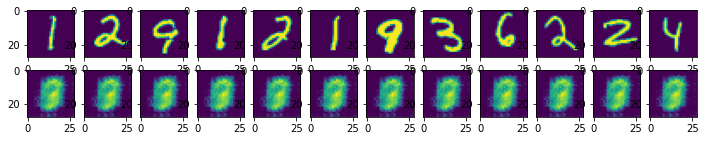

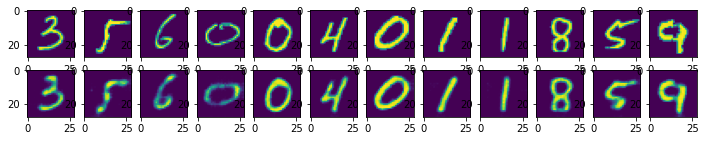

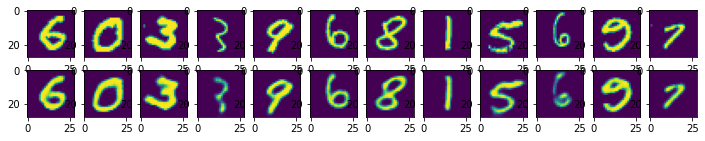

In [ ]:
numImgs=12;
for k in range(0, max_epochs, 9):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].detach().numpy()    
    recon = outputs[k][2].detach().numpy()
    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.imshow(item[0])

#### Generate synthesised images
We can **interpolate** between two images via the learned embeddding. Let us pick the first `5` (on my machine) and third image `6`  (on my machine) from the first epoch and obtain the low-dimensional embedding using the learned encoder. 

In [ ]:
epochIndex=0;
img1Index=0;
img2Index=2;

imgs = outputs[epochIndex][1].detach().numpy()
x1 = outputs[epochIndex][1][img1Index,:,:,:];# first image
x2 = outputs[epochIndex][1][img2Index,:,:,:] # second image
x = torch.stack([x1,x2])     # stack them together so we only call `encoder` once
embedding = myAE.encoder(x)
e1 = embedding[0] # embedding of first image
e2 = embedding[1] # embedding of second image
print(e1.size())

torch.Size([64, 1, 1])


In the embedding space, we do a linear interpolation between the two embeddings and then decode these interpolated embeddings into images.

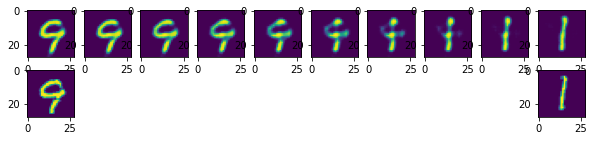

In [ ]:
embedding_values = []
for i in range(0, 10):
    e = e1 * (i/10) + e2 * (10-i)/10
    embedding_values.append(e)
embedding_values = torch.stack(embedding_values)

recons = myAE.decoder(embedding_values)
plt.figure(figsize=(10, 2))
for i, recon in enumerate(recons.detach().numpy()):
    plt.subplot(2,10,i+1)
    plt.imshow(recon[0])
plt.subplot(2,10,11)
plt.imshow(imgs[img2Index][0])
plt.subplot(2,10,20)
plt.imshow(imgs[img1Index][0])

---
### <a id='Q3'></a>Question 4

Apply PCA from `sklearn` to the training data from the MNIST training dataset above. Print the top 30 eigenvalues.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
X = np.array(mnist_data[:][0][0].numpy()).reshape(1, 28*28)
for i in range(1, len(mnist_data[:])):
    X = np.append(X,np.array(mnist_data[:][i][0].numpy()).reshape(1, 28*28),axis = 0)
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)
pca.fit(X)
cov_matrix = np.dot(X.T, X) / len(X)

for eigenvector in pca.components_[:30]:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

40.10094
29.599234
27.294975
21.09895
18.586906
15.54222
13.906313
13.008179
11.2583065
10.309492
9.882099
8.633274
8.233274
8.032677
7.6484623
7.388815
7.184516
7.0912795
6.6882825
6.3973656
6.25477
6.0928106
5.8411922
5.818903
5.6858807
5.3877525
5.26311
5.0777245
4.904128
4.730913


---

---
### <a id='Q3'></a>Question 5

Plot the **cumulative** variances captured by the top 30 PCs (plot 30 values in total, e.g., the cumulative variance for the top 5 PCs is the summation of variance captured by the top 5 PCs).

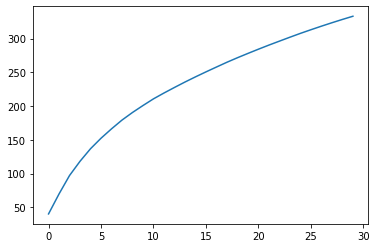

In [ ]:
# Answer: 

plt.plot(np.cumsum(pca.explained_variance_)[:30])


---

---
### Question 6

Run a [drug discovery example in Google Colab](https://colab.research.google.com/github/pykale/pykale/blob/main/examples/bindingdb_deepdta/tutorial.ipynb) to understand the pipeline and architecture there.


## Additional ideas to explore

* Code PCA using ``torch.nn`` and compare it with the close-form solution via eigendecomposition (e.g. that in `sklearn`).
* Try out different optimisers or different loss function (the L1loss, MAE) and compare the results.
* Change the architecture of autoencoder (e.g., depth, other layers such as max pooling, different activation functions) to compare the results.
* Repeat the above on a subset from the CIFAR10 dataset. For example, you can interpolate a cat and a dog.